Let's make a skincancer classifier!!

You can see the dataset [**here**](https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000), this notebook is final assignment of [**Belajar Pengembangan Machine Learning**](https://www.dicoding.com/academies/185) Course on Dicoding, created by [**Satria Kemal**](https://www.dicoding.com/users/codesigma)

# Data Preparation

Importing libraries

In [62]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

import os

Load dataset

In [42]:
FilePath = "../input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv"
df = pd.read_csv(FilePath)

let's look at the dataframe, each column represents a pixel value, we have to convert them into 28x28x3 before throw them into models

In [43]:
df

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


In [44]:
label = df["label"]
df = df.drop(columns=["label"]) 

Plot label distribution

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

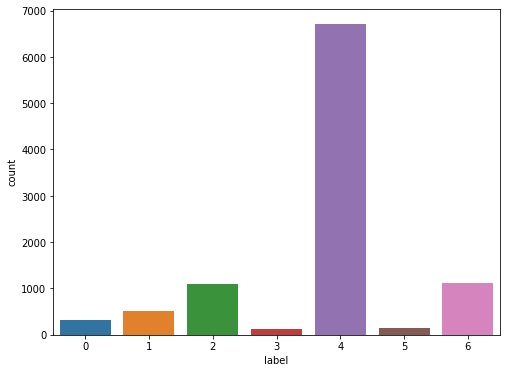

In [45]:
plt.figure(figsize = (8,6))
sns.countplot(label)

Imbalanced dataset might hurt the performance of our models, so we have to make them balanced. 

One of the methods can we use is oversamping.


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

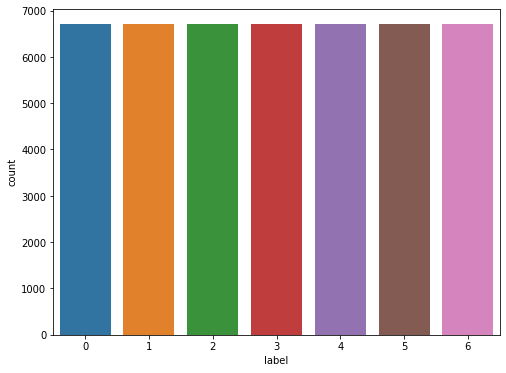

In [46]:
sampler = RandomOverSampler()
df, label = sampler.fit_resample(df, label)

plt.figure(figsize = (8,6))
sns.countplot(label)

Splitting dataset into train and test set, and reshape them so it can be thrown into the model

In [47]:
X_train , X_test , y_train , y_test = train_test_split(df , label , test_size = 0.2)
X_train = np.array(X_train).reshape(-1,28,28,3)
X_test = np.array(X_test).reshape(-1,28,28,3)

Image examples after we converted the dataframe into 28x28x3 matrices

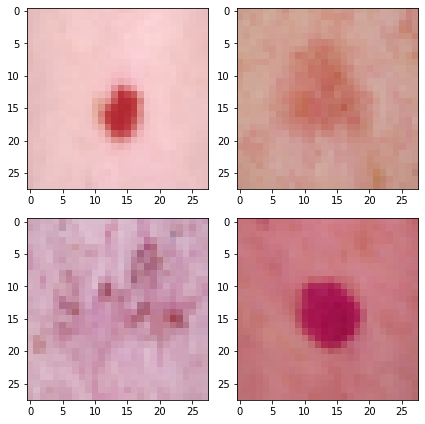

In [48]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(6, 6)
k = 0 
for i in range(2):
    for j in range(2):
        axes[i, j].imshow(X_train[k])
        k += 1
plt.tight_layout()

Encode the labels, so we can use them for training

They will look like this: [0, 1, 0, 0, 0, 0, 0] to represent label 1 (0-based indexing)

In [63]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Modelling

For this problem, this architecture works best so far

In [52]:
model = Sequential([
            Input(shape = [28,28,3]),
            Conv2D(32 , (3,3) , activation='relu',padding='same'),
            MaxPooling2D(),
            BatchNormalization(),
            Conv2D(64 , (3,3) , activation='relu',padding='same'),
            Conv2D(64 , (3,3) , activation='relu',padding='same'),
            MaxPooling2D(),
            BatchNormalization(), 
            Conv2D(128 , (3,3) , activation='relu',padding='same'),
            Conv2D(128 , (3,3) , activation='relu',padding='same'),
            MaxPooling2D(),
            BatchNormalization(),
            Conv2D(256 , (3,3) , activation='relu',padding='same'),
            Conv2D(256 , (3,3) , activation='relu',padding='same'),
            MaxPooling2D(),
            Flatten(),
            Dropout(.5),
            Dense(256, activation = 'relu'),
            BatchNormalization(),
            Dense(128, activation = 'relu'),
            BatchNormalization(),
            Dense(64, activation = 'relu'),
            BatchNormalization(),
            Dense(32, activation = 'relu'),
            BatchNormalization(),
            Dense(7, activation = 'softmax'),
])

model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

Create model save path for checkpoint callback and saving models

In [53]:
#make model folder model
model._name = 'skincancer_CNN'
model_save_path = "."
if not os.path.exists(model_save_path):
    os.mkdir(model_save_path)

Callbacks

In [54]:
early_stop = EarlyStopping(patience=10, verbose=1, monitor='val_accuracy', mode='max')
reduce_lr =  ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=7, min_delta=1e-4, mode='max')
checkpoint = ModelCheckpoint(os.path.join(model_save_path, model.name+".h5"), save_weights_only=True,
                             verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')

In [55]:
model.summary()

Model: "skincancer_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 7, 7, 64)       

# Training

In [56]:
history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=128,
                    steps_per_epoch=len(X_train)//128,
                    validation_data= (X_test, y_test),
                    callbacks=[early_stop, checkpoint, reduce_lr])

Epoch 1/30
293/293 [==============================] - 5s 12ms/step - loss: 1.6587 - accuracy: 0.3684 - val_loss: 1.5072 - val_accuracy: 0.4359

Epoch 00001: val_accuracy improved from -inf to 0.43592, saving model to ./skincancer_CNN.h5
Epoch 2/30
293/293 [==============================] - 3s 11ms/step - loss: 0.6802 - accuracy: 0.7549 - val_loss: 0.6092 - val_accuracy: 0.7719

Epoch 00002: val_accuracy improved from 0.43592 to 0.77192, saving model to ./skincancer_CNN.h5
Epoch 3/30
293/293 [==============================] - 3s 12ms/step - loss: 0.4002 - accuracy: 0.8573 - val_loss: 0.7801 - val_accuracy: 0.7689

Epoch 00003: val_accuracy did not improve from 0.77192
Epoch 4/30
293/293 [==============================] - 3s 11ms/step - loss: 0.2781 - accuracy: 0.8990 - val_loss: 0.5529 - val_accuracy: 0.8055

Epoch 00004: val_accuracy improved from 0.77192 to 0.80548, saving model to ./skincancer_CNN.h5
Epoch 5/30
293/293 [==============================] - 3s 11ms/step - loss: 0.2071 - 

# Plot Training

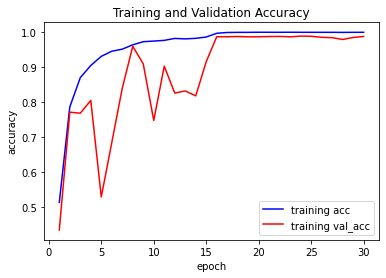

In [57]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(val_acc) + 1)

plt.plot(epochs, acc, color="blue", label="training acc")
plt.plot(epochs, val_acc, color="red", label="training val_acc")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Training and Validation Accuracy")
# plt.savefig(f"./balanced/models/{model._name}_f1_training_plot.jpg")
plt.show()

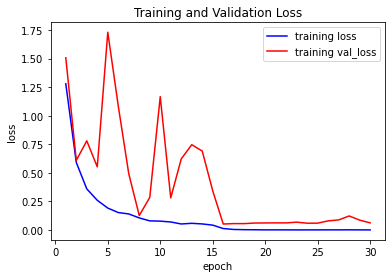

In [58]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(val_acc) + 1)

plt.plot(epochs, loss, color="blue", label="training loss")
plt.plot(epochs, val_loss, color="red", label="training val_loss")

plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Training and Validation Loss")

plt.show()

# Convert to TFLite

In [59]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [60]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

**THAT'S IT!!**, Please give me some suggestions or tips to improve this models, thanks :)